In [4]:
%matplotlib inline

from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import csv
from scipy.stats import norm
import numpy as np
import scipy.stats as stats

In [5]:
data = open('../data/data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]

In [6]:
from sklearn import mixture 
def fit_samples(samples):
    gmix = mixture.GMM(n_components=2, covariance_type='full')
    gmix.fit(samples)
    print gmix.means_
    print gmix.get_params
    colors = ['r' if i==0 else 'g' for i in gmix.predict(samples)]
    ax = plt.gca()
    ax.scatter(samples[:,0], samples[:,1], c=colors, alpha=0.8)
    plt.show()

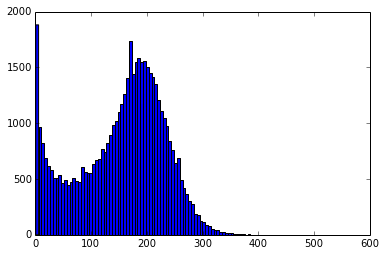

In [7]:
unmaskedSynapsesNoZero = ([r[-1] for r in rows if r[-2] != 0 if r[-1] !=0])
plt.hist(unmaskedSynapsesNoZero, bins = 100)
plt.show()

In [8]:
arr = []

#print unmaskedSynapsesNoZero

#print len(unmaskedSynapsesNoZero)

for i in unmaskedSynapsesNoZero:
    arr.append([i])
    #print unmaskedSynapsesNoZero[i]
    
arr = np.asarray(arr)

#print arr
#print len(arr)
print max(arr)
print min(arr)

[507]
[1]


[[  76.87417564]
 [ 199.49079895]]
<bound method GMM.get_params of GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)>
[[[ 3284.21004512]]

 [[ 1984.37243584]]]


IndexError: index 1 is out of bounds for axis 1 with size 1

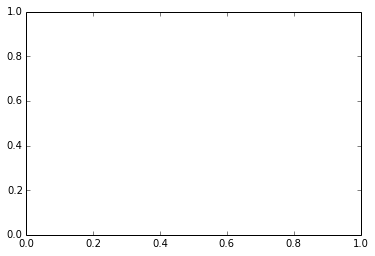

In [9]:
from sklearn import mixture 
gmix = mixture.GMM(n_components=2, covariance_type='full')
gmix.fit(arr)
print gmix.means_
print gmix.get_params
print gmix.covars_
colors = ['r' if i==0 else 'g' for i in gmix.predict(arr)]
ax = plt.gca()
ax.scatter(arr[:,0], arr[:,1], c=colors, alpha=0.8)
plt.show()

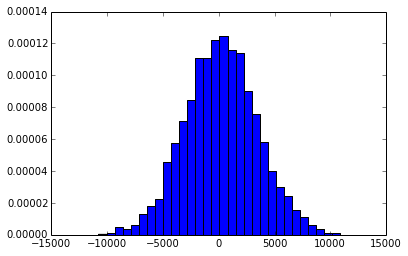

In [19]:
means = gmix.means_
cov = gmix.covars_
mu1 = means[0][0]
mu2 = means[1][0]
sigma1 = cov[0][0][0]
sigma2 = cov[1][0][0]

s1 = np.random.normal(mu1, sigma1, 5000)
s2 = np.random.normal(mu2, sigma2, 5000)

count, bins, ignored = plt.hist(s1, 30, normed=True)

In [87]:
clf = GMM(2, n_iter=500, random_state=3).fit(arr)
xpdf = np.linspace(0, 400, 2000)
density = np.exp(clf.score(xpdf))

plt.hist(arr, 80, normed=True, alpha=0.5)
plt.plot(xpdf, density, '-r')
plt.xlim(0, 400);


/Library/Python/2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: The shape of X  is not compatible with self

In [39]:
print x
print len(x)
y = x[2300:]
print y
print len(y)
z = [x[:2300],x[2300:]]

z = np.vstack(z)
print type(z)
print z

z = z.reshape(-1, 1)
print z

[-0.83351569 -0.11253365 -4.27239219 ...,  3.3388401   2.95246163
  2.55136449]
4600
[  6.14420706  13.69775174   4.09194643 ...,   3.3388401    2.95246163
   2.55136449]
2300
<type 'numpy.ndarray'>
[[ -0.83351569  -0.11253365  -4.27239219 ...,   5.2373651    8.21389964
    1.00285464]
 [  6.14420706  13.69775174   4.09194643 ...,   3.3388401    2.95246163
    2.55136449]]
[[-0.83351569]
 [-0.11253365]
 [-4.27239219]
 ..., 
 [ 3.3388401 ]
 [ 2.95246163]
 [ 2.55136449]]
